<h1 align="center">
  <span>Project</span>
  <span>Name</span>
  <span>-</span>
  <span>Lung</span>
  <span>Cancer</span>
  <span>Prediction</span>
  <span>.</span>
</h1>

<style>
    h1 {
        text-align: center;
        color: white;
        padding: 50px;
        border-radius: 12px;
        display: inline-block;
        background: linear-gradient(90deg, #1C3A13, #574F2A, #84732B, #EC4E20);
        background-size: 200% 200%;
        transition: background-position 0.6s ease, transform 0.4s ease;
        cursor: pointer;
    }

    h1 span {
        opacity: 0.3;
        display: inline-block;
        transform: translateY(20px);
        transition: opacity 0.4s ease, transform 0.4s ease;
    }

    h1:hover {
        background-position: 100% 0;
        transform: scale(1.05);
    }

    /* Staggered reveal effect */
    h1:hover span {
        opacity: 1;
        transform: translateY(0);
    }

    h1:hover span:nth-child(1) { transition-delay: 0s; }
    h1:hover span:nth-child(2) { transition-delay: 0.2s; }
    h1:hover span:nth-child(3) { transition-delay: 0.4s; }
    h1:hover span:nth-child(4) { transition-delay: 0.6s; }
    h1:hover span:nth-child(5) { transition-delay: 0.8s; }
    h1:hover span:nth-child(6) { transition-delay: 1.0s; }
    h1:hover span:nth-child(7) { transition-delay: 1.2s; }
</style>



##### **Project Type**    - EDA/Classification
##### **Contribution**    - Individual
##### **Member Name -** Kushang Shah

# **Project Summary -**


<h2>About this Project</h2>
<p style="font-size:15px; line-height:1.6;">
    This project focuses on predicting the survival of Lung cancer using a dataset containing various clinical and demographic factors.
    The notebook covers the following main steps:
</p>
<ul style="font-size:15px; line-height:1.6; margin-left:20px;">
    <li><b>Data Loading and Understanding:</b> Load the dataset and explore its basic characteristics, including row and column count, data types, duplicate values, and missing values.</li>
    <li><b>Exploratory Data Analysis (EDA):</b> Visualize and analyze relationships between different variables and the target variable (survived) to gain insights.</li>
    <li><b>Hypothesis Testing:</b> Perform statistical tests to validate hypotheses about relationships between variables.</li>
    <li><b>Feature Engineering & Data Pre-processing:</b> Prepare the data for machine learning by splitting it into training and testing sets and scaling numerical features.</li>
    <li><b>ML Model Implementation:</b> Train and evaluate multiple machine learning models (Logistic Regression, Decision Tree, Random Forest, SVM, KNN and XGB) to predict the survival of patient.</li>
    <li><b>Model Selection and Conclusion:</b> Choose the best-performing model based on evaluation metrics and summarize the project findings.</li>
    <li><b>Future Work:</b> Save the best model for potential deployment and perform sanity checks with test data.</li>
</ul>
<br><br>

# **GitHub Link -**

My GitHub Link [here](https://github.com/KushangShah/Lung-Cancer-Prediction).

# **Problem Statement**



<p style="font-size:15px; line-height:1.6;">
    Lung Cancer is a serious health issue with varying stages of severity. 
    Accurately predicting the stage of cancer stage is crucial for effective patient management and treatment planning. 
    This project aims to develop a machine learning model that can predict the stage of Lung Cancer based on patient data.
</p>

<p style="font-size:15px; line-height:1.6;">
    Here are some key questions explored in this study:
</p>
<ul style="font-size:15px; line-height:1.6; margin-left:20px;">
    <li>Can we predict the stage of Lung Cacner based on clinical and demographic factors?</li>
    <li>Which factors are most influential in determining the stages of cancer?</li>
    <li>Are there specific patterns in the data that differentiate between the stages?</li>
    <li>How do different machine learning models perform in predicting cancer stages?</li>
    <li>Can our model help in early identification of advanced lung cancer stages?</li>
    <li>What is the potential impact of treatments on cancer progression across stages?</li>
</ul>
<br>

# ***Let's Begin !***

## ***1. Know Your Data***

### Install Library if doesn't exist

In [121]:
!pip3 install -r requirements.txt

### Import Libraries

In [122]:
# Import Libraries
# Import Libraries
# Core Libraries
import pandas as pd 
import numpy as np 

# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

# For imbalance
from imblearn.over_sampling import SMOTE

# Statistical Tests
from scipy import stats
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

# Machine Learning (Preprocessing & Model Selection)
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline 

# Machine Learning Models
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, 
    classification_report, roc_curve, auc
)

# XGBoost
from xgboost import XGBClassifier

# Optional (to suppress warnings)
import warnings
warnings.filterwarnings('ignore')

# createing a folder to save dataframes
import os
try:
    os.mkdir("metricx_insight")
    print("metricx_insight created to store insights found on this notebook.")
except FileExistsError as r:
    print("File-metricx_insight already exist. don't worry.\nIt's used to store insights which are found from this notebook.")


metricx_insight created to store insights found on this notebook.


### Dataset Loading

In [123]:
# Load Dataset
lung_cancer_df = pd.read_csv('dataset_med.csv')

# copy the original dataset
df = lung_cancer_df.copy()

### Dataset First View

In [124]:
# Dataset First Look
print('Viewing the dataset:')
display(df)

Viewing the dataset:


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,2,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,3,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,4,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,5,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,889997,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,889998,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,889999,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


### Dataset Rows & Columns count

In [125]:
# Dataset Rows & Columns count
print(f"Dataset Rows and Columns: \nNum of Rows: {df.shape[0]}\nNum of Columns: {df.shape[1]}")

Dataset Rows and Columns: 
Num of Rows: 890000
Num of Columns: 17


### Dataset Information

In [126]:
# Dataset Info
print("Dataset information: ")
df.info()

Dataset information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatmen

#### Duplicate Values

In [127]:
# Dataset Duplicate Value Count
print(f"Num of duplicated rows in dataset: {df.duplicated().sum()}")

Num of duplicated rows in dataset: 0


#### Missing Values/Null Values

In [128]:
# Missing Values/Null Values Count
print(f"Num of missing values in dataset: \n{df.isna().sum()}")

Num of missing values in dataset: 
id                    0
age                   0
gender                0
country               0
diagnosis_date        0
cancer_stage          0
family_history        0
smoking_status        0
bmi                   0
cholesterol_level     0
hypertension          0
asthma                0
cirrhosis             0
other_cancer          0
treatment_type        0
end_treatment_date    0
survived              0
dtype: int64


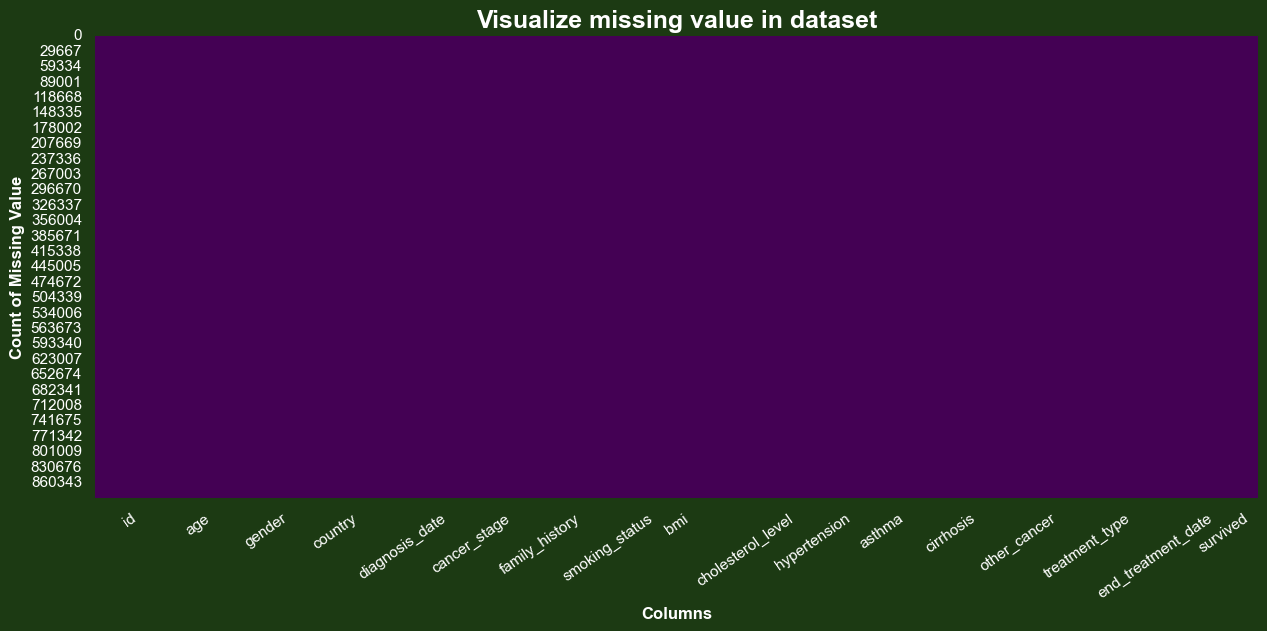

In [129]:
# Visualizing the missing values
plt.style.use("dark_background")
sns.set_theme(style="darkgrid", rc={
    'figure.facecolor': "#1C3A13",    # whole figure background
    'axes.facecolor': "#484124",      # plot area background
    'axes.labelcolor': "white",
    'xtick.color': "white",
    'ytick.color': 'white',
    'text.color': "white",
    'axes.edgecolor': '#EC4E20',
    'grid.color': '#84732B'
})


# Visualizing the missing values
plt.figure(figsize=(15, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Visualize missing value in dataset", fontsize=18, weight='bold')
plt.xlabel("Columns", weight='bold')
plt.ylabel("Count of Missing Value", weight='bold')
plt.xticks(rotation=35)
plt.show()

### What did you know about your dataset?

---

Dataset Rows and Columns: 
Num of Rows: 890000
Num of Columns: 17

---

No duplicated rows in dataset.

---

No missing values in dataset.

## ***2. Understanding Your Variables***

In [130]:
# Dataset Columns
print(f"Name of columns: \n{[col for col in df.columns]}")

Name of columns: 
['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type', 'end_treatment_date', 'survived']


In [131]:
# Dataset Describe
print("Dataset Description: ")
display(round(df.describe(), 2))

Dataset Description: 


,id,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.00,890000.00,890000.00,890000.00,890000.00,890000.00,890000.00,890000.00,890000.00
mean,445000.50,55.01,30.49,233.63,0.75,0.47,0.23,0.09,0.22
std,256921.01,9.99,8.37,43.43,0.43,0.50,0.42,0.28,0.41
min,1.00,4.00,16.00,150.00,0.00,0.00,0.00,0.00,0.00
25%,222500.75,48.00,23.30,196.00,1.00,0.00,0.00,0.00,0.00
50%,445000.50,55.00,30.50,242.00,1.00,0.00,0.00,0.00,0.00
75%,667500.25,62.00,37.70,271.00,1.00,1.00,0.00,0.00,0.00
max,890000.00,104.00,45.00,300.00,1.00,1.00,1.00,1.00,1.00


### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [132]:
unique_value = []
for col in df.columns:
    result = {
        'Colum' : col,
        'total unique values' : len(df[col].unique()),
        'Unique Values' : df[col].unique()
    }
    unique_value.append(result)
    print(f"{col} {len(df[col].unique())}")

id 890000
age 95
gender 2
country 27
diagnosis_date 3651
cancer_stage 4
family_history 2
smoking_status 4
bmi 291
cholesterol_level 151
hypertension 2
asthma 2
cirrhosis 2
other_cancer 2
treatment_type 4
end_treatment_date 4194
survived 2


In [133]:
unique_value

[{'Colum': 'id',
  'total unique values': 890000,
  'Unique Values': array([     1,      2,      3, ..., 889998, 889999, 890000],
        shape=(890000,))},
 {'Colum': 'age',
  'total unique values': 95,
  'Unique Values': array([ 64.,  50.,  65.,  51.,  37.,  49.,  56.,  48.,  47.,  67.,  45.,
          46.,  21.,  62.,  60.,  57.,  36.,  61.,  71.,  74.,  35.,  54.,
          44.,  68.,  59.,  58.,  63.,  69.,  70.,  52.,  40.,  78.,  75.,
          72.,  42.,  53.,  39.,  66.,  41.,  43.,  55.,  38.,  30.,  34.,
          76.,  73.,  80.,  31.,  85.,  28.,  79.,  87.,  77.,  33.,  32.,
          25.,  90.,  84.,  81.,  27.,  82.,  83.,  22.,  86.,  26.,  93.,
          29.,  23.,  19.,  24.,  89.,  18.,  91.,  95.,  88.,  20.,  94.,
         101.,  15.,  92.,  16.,  17.,  10.,  14.,  99.,  13.,  97.,   9.,
          12.,  98.,   7.,  96.,   4., 104.,   8.])},
 {'Colum': 'gender',
  'total unique values': 2,
  'Unique Values': array(['Male', 'Female'], dtype=object)},
 {'Colum': 'cou

In [134]:
unique_value_df = pd.DataFrame(unique_value)


unique_value_df.to_csv("metricx_insight/unique_values_in_dataset.csv", index=False)

# display(unique_value_df)
unique_value_df.iloc[:, :2]

,Colum,total unique values
0,id,890000
1,age,95
2,gender,2
3,country,27
4,diagnosis_date,3651
5,cancer_stage,4
6,family_history,2
7,smoking_status,4
8,bmi,291
9,cholesterol_level,151


## 3. ***Data Wrangling***

### Data Wrangling Code

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  object 
 3   country             890000 non-null  object 
 4   diagnosis_date      890000 non-null  object 
 5   cancer_stage        890000 non-null  object 
 6   family_history      890000 non-null  object 
 7   smoking_status      890000 non-null  object 
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  object 
 15  end_treatment_date  890000 non-nul

In [136]:
# Write your code to make your dataset analysis ready.

# label encodeing the categorical columns
# let's split data into cat and numerical group
numeric_features = df.select_dtypes(include=['int64','float']).columns.tolist()
print("\nNumerical Feature: \n", numeric_features)

categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Feature: \n", categorical_features)

# convert cat feature into numerical feature
label_encoders={}
for col in categorical_features:
    label_encoders[col]=LabelEncoder()
    df[col]=label_encoders[col].fit_transform(df[col])
    
print("\ndf after label encoding")    
display(df)

df


Numerical Feature: 
 ['id', 'age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'survived']

Categorical Feature: 
 ['gender', 'country', 'diagnosis_date', 'cancer_stage', 'family_history', 'smoking_status', 'treatment_type', 'end_treatment_date']

df after label encoding


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0
1,2,50.0,0,19,3244,2,1,3,41.2,280,1,1,0,0,3,3483,1
2,3,65.0,0,12,3229,2,1,1,44.0,268,1,1,0,0,1,3414,0
3,4,51.0,0,1,613,0,0,3,43.0,241,1,1,0,0,0,871,0
4,5,37.0,1,17,3467,0,0,3,19.7,178,0,0,0,0,1,3688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,18,2951,3,0,3,44.8,243,1,1,1,0,2,3003,0
889996,889997,62.0,0,4,482,1,1,1,21.6,240,0,0,0,0,3,928,0
889997,889998,48.0,0,7,664,2,1,2,38.6,242,1,0,0,0,1,781,1
889998,889999,67.0,0,23,568,3,1,1,18.6,194,1,1,0,0,0,1104,0


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0
1,2,50.0,0,19,3244,2,1,3,41.2,280,1,1,0,0,3,3483,1
2,3,65.0,0,12,3229,2,1,1,44.0,268,1,1,0,0,1,3414,0
3,4,51.0,0,1,613,0,0,3,43.0,241,1,1,0,0,0,871,0
4,5,37.0,1,17,3467,0,0,3,19.7,178,0,0,0,0,1,3688,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,889996,40.0,1,18,2951,3,0,3,44.8,243,1,1,1,0,2,3003,0
889996,889997,62.0,0,4,482,1,1,1,21.6,240,0,0,0,0,3,928,0
889997,889998,48.0,0,7,664,2,1,2,38.6,242,1,0,0,0,1,781,1
889998,889999,67.0,0,23,568,3,1,1,18.6,194,1,1,0,0,0,1104,0


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  int64  
 3   country             890000 non-null  int64  
 4   diagnosis_date      890000 non-null  int64  
 5   cancer_stage        890000 non-null  int64  
 6   family_history      890000 non-null  int64  
 7   smoking_status      890000 non-null  int64  
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  int64  
 15  end_treatment_date  890000 non-nul

### What all manipulations have you done and insights you found?

| **Column**                | **Total Unique Values** | **Description**                                                                               |
|---------------------------|-------------------------|-----------------------------------------------------------------------------------------------|
| id                        | 890,000                 | Unique identifier for each patient.                                                          |
| age                       | 95                      | Patient's age at diagnosis.                                                                   |
| gender                    | 2                       | Patient's gender (e.g., male, female).                                                      |
| country                   | 27                      | Patient's country or region of residence.                                                    |
| diagnosis_date            | 3,651                   | Date of lung cancer diagnosis.                                                                |
| cancer_stage              | 4                       | Stage of lung cancer at diagnosis (e.g., Stage I, Stage II, Stage III, Stage IV).           |
| family_history            | 2                       | Whether there is a family history of cancer (e.g., yes, no).                                |
| smoking_status            | 4                       | Patient's smoking status (e.g., current smoker, former smoker, never smoked, passive smoker).|
| bmi                       | 291                     | Patient's Body Mass Index at diagnosis.                                                      |
| cholesterol_level         | 151                     | Patient's cholesterol level (value).                                                         |
| hypertension              | 2                       | Whether the patient has high blood pressure (e.g., yes, no).                                 |
| asthma                    | 2                       | Whether the patient has asthma (e.g., yes, no).                                             |
| cirrhosis                 | 2                       | Whether the patient has liver cirrhosis (e.g., yes, no).                                    |
| other_cancer              | 2                       | Whether the patient has had another type of cancer besides the primary diagnosis (e.g., yes, no).|
| treatment_type            | 4                       | Type of treatment received (e.g., surgery, chemotherapy, radiation, combined).               |
| end_treatment_date        | 4,194                   | Date when the patient completed treatment or died.                                           |
| survived                  | 2                       | Whether the patient survived (e.g., yes, no).                                              |


---

turned categorical feature label into numerical type. i,e., Object -> int/float

---

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [138]:
df.head(1)

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0


#### Chart - 1: Distribution of Patient Ages

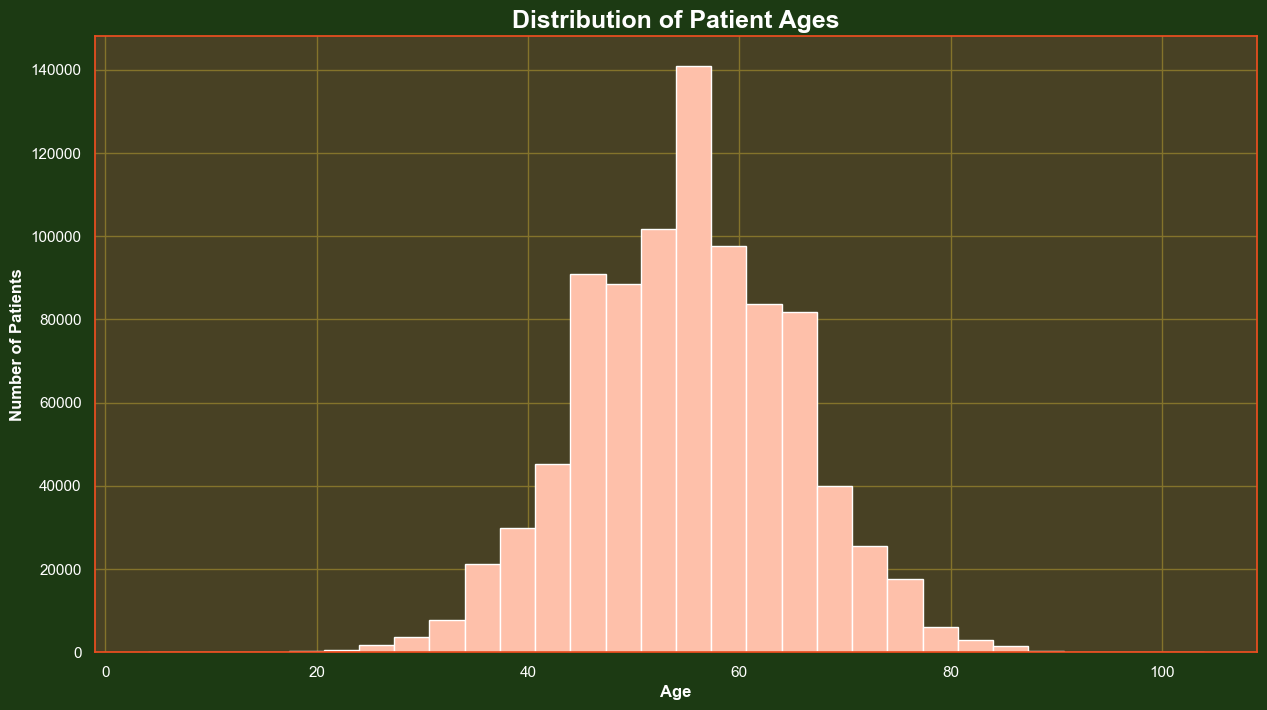

In [139]:
# Chart - 1 Distribution of Patient Ages
plt.figure(figsize=(15, 8))
ax = plt.hist(df['age'], bins=30, color="#FEC0AA")
plt.title("Distribution of Patient Ages", weight='bold', fontsize=18)
plt.xlabel("Age", weight='bold')
plt.ylabel("Number of Patients", weight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

To understand which age group has more lung cancer diagnoses.

##### 2. What is/are the insight(s) found from the chart?

Most diagnoses occur between 55–70 years.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Awareness programs and screenings should target middle-aged adults.

#### Chart - 2: Gender Distribution

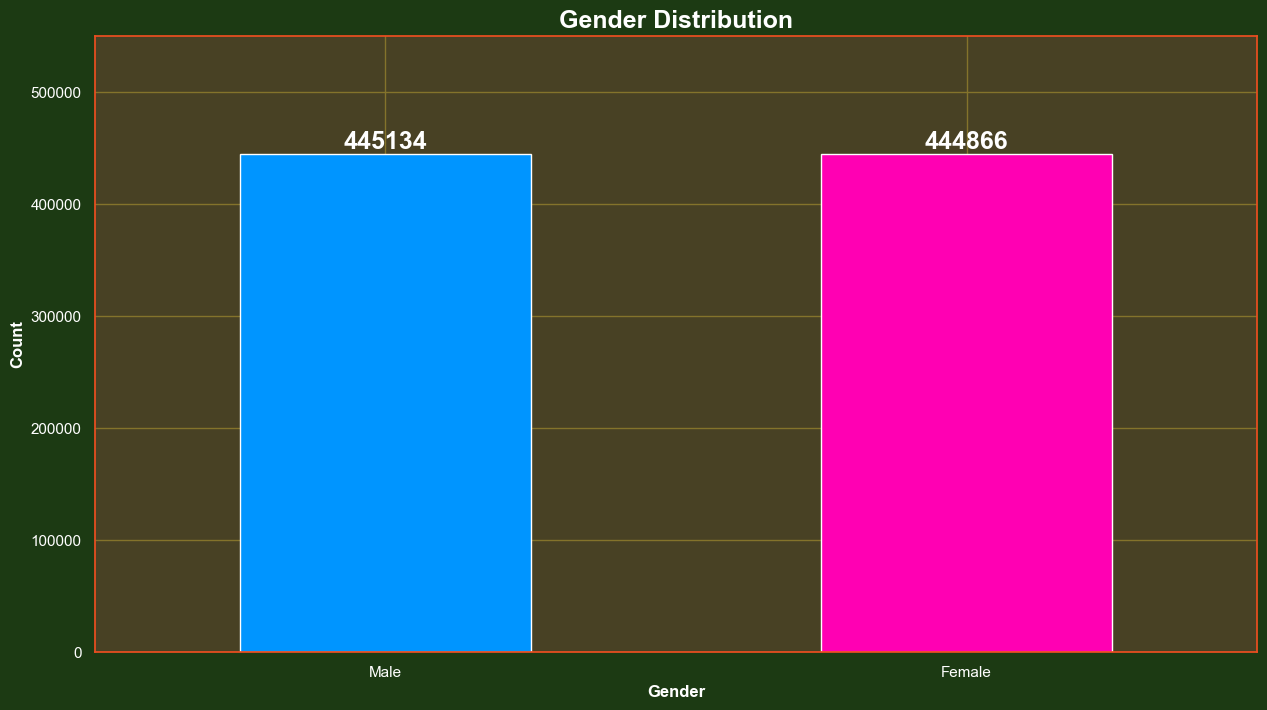

In [140]:
# Chart - 2 Gender Distribution
mf_pallate = ["#0095FF", "#FF00B3"]

plt.figure(figsize=(15, 8))
ax = df['gender'].value_counts().plot(kind='bar', color=mf_pallate)
plt.title("Gender Distribution", weight='bold', fontsize=18)
plt.xlabel("Gender", weight='bold')
plt.ylabel("Count", weight='bold')
plt.ylim(0, 550000)
ax.set_xticklabels(["Male", "Female"])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', weight='bold', fontsize=18)

plt.show()


##### 1. Why did you pick the specific chart?

Bar plot.

##### 2. What is/are the insight(s) found from the chart?

If males dominate, campaigns can focus on male smoking habits.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Better-targeted prevention awareness → positive impact.

#### Chart - 3

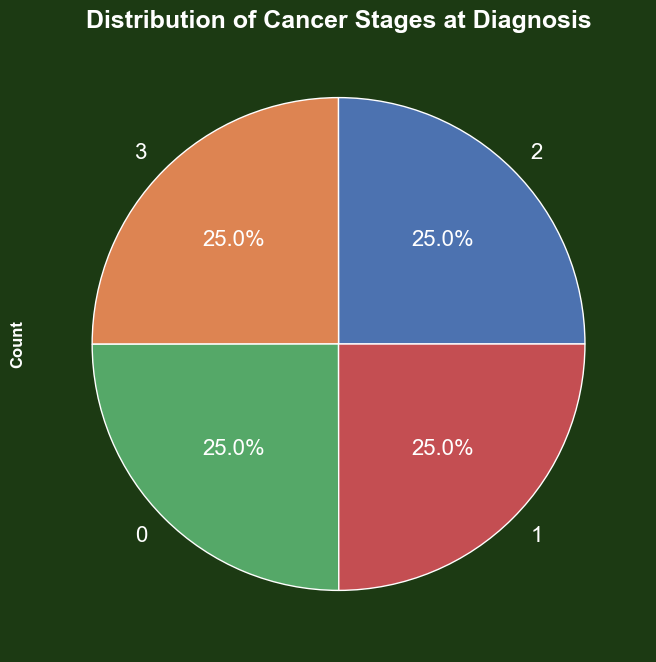

In [141]:
# Chart - 3 visualization code

plt.figure(figsize=(15, 8))
df['cancer_stage'].value_counts().plot(kind='pie', autopct='%1.1f%%', fontsize=16)
plt.title("Distribution of Cancer Stages at Diagnosis", weight='bold', fontsize=18)
plt.ylabel("Count", weight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart.

##### 2. What is/are the insight(s) found from the chart?

A high proportion in Stage III–IV shows late detection.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Indicates the need for early screening programs.

#### Chart - 4: Smoking Status of Patients

In [142]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

In [143]:
df['smoking_status']

0         3
1         3
2         1
3         3
4         3
         ..
889995    3
889996    1
889997    2
889998    1
889999    0
Name: smoking_status, Length: 890000, dtype: int64

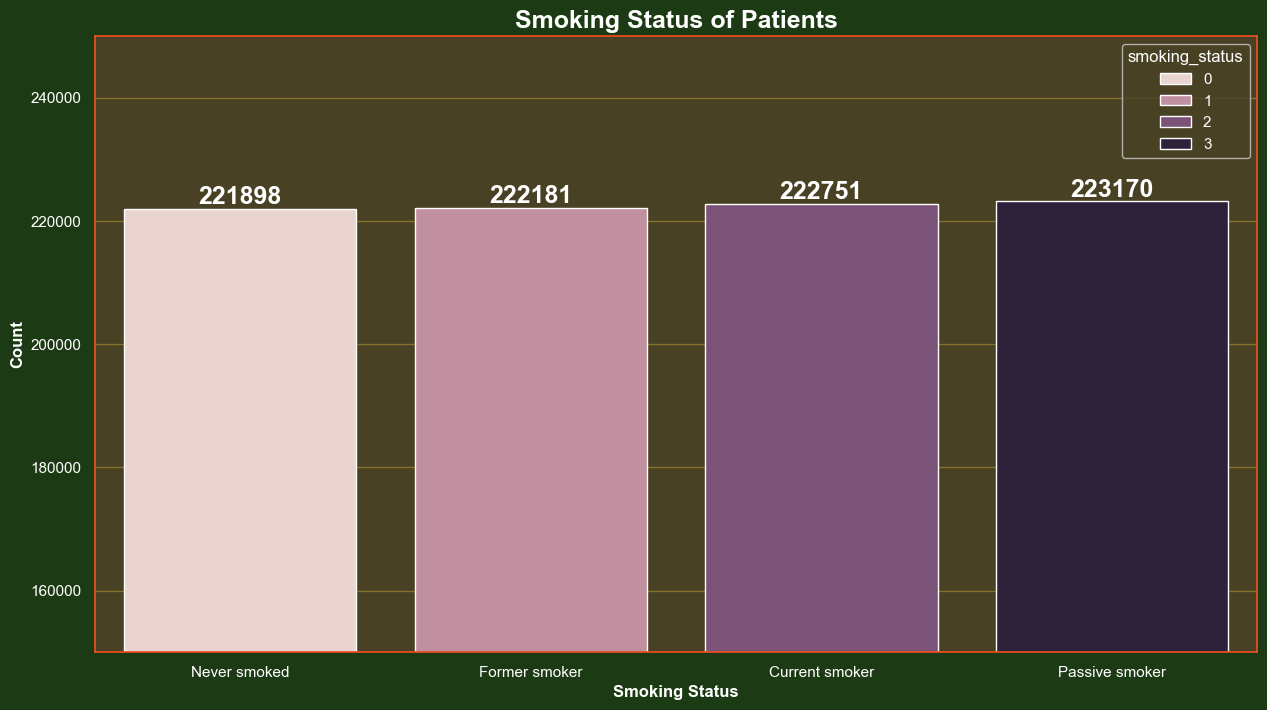

In [144]:
# Chart - 4 visualization code
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='smoking_status', data=df, hue='smoking_status')
plt.title("Smoking Status of Patients", weight='bold', fontsize=18)
plt.xlabel("Smoking Status", weight='bold')
plt.ylabel("Count", weight='bold')
plt.xticks(rotation=0)
plt.ylim(150000, 250000)

# Change tick labels
ax.set_xticklabels(['Never smoked', 'Former smoker', 'Current smoker', 'Passive smoker'])


# Add labels on bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center', va='bottom', weight='bold', fontsize=18
    )

plt.show()


##### 1. Why did you pick the specific chart?

Bar Chart

##### 2. What is/are the insight(s) found from the chart?

If “current smokers” are majority, anti-smoking drives are crucial.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Reducing smoking prevalence → long-term positive growth in public health.

#### Chart - 5

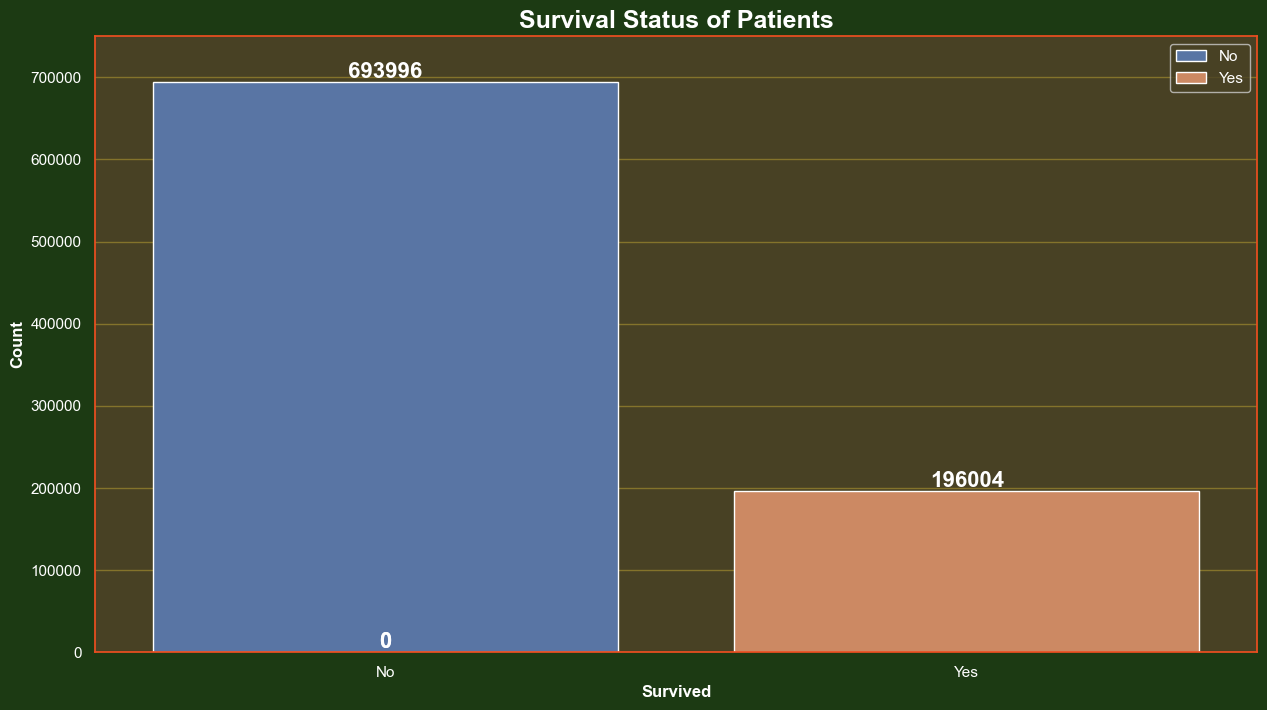

In [145]:
# Chart - 5 visualization code
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='survived', data=df, hue='survived')
plt.title("Survival Status of Patients", weight='bold', fontsize=18)
plt.xlabel("Survived", weight='bold')
plt.ylabel("Count", weight='bold')
plt.ylim(0, 750000)
ax.set_xticklabels(["No", "Yes"])
plt.xticks(rotation=0)
plt.legend(['No', 'Yes'])

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=16, weight='bold'
    )

plt.show()


##### 1. Why did you pick the specific chart?

Count Plot

##### 2. What is/are the insight(s) found from the chart?

If survival rate < 50%, it’s alarming → need to improve treatment access.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Highlights potential healthcare improvement areas.

#### Chart - 6: Age vs Survival

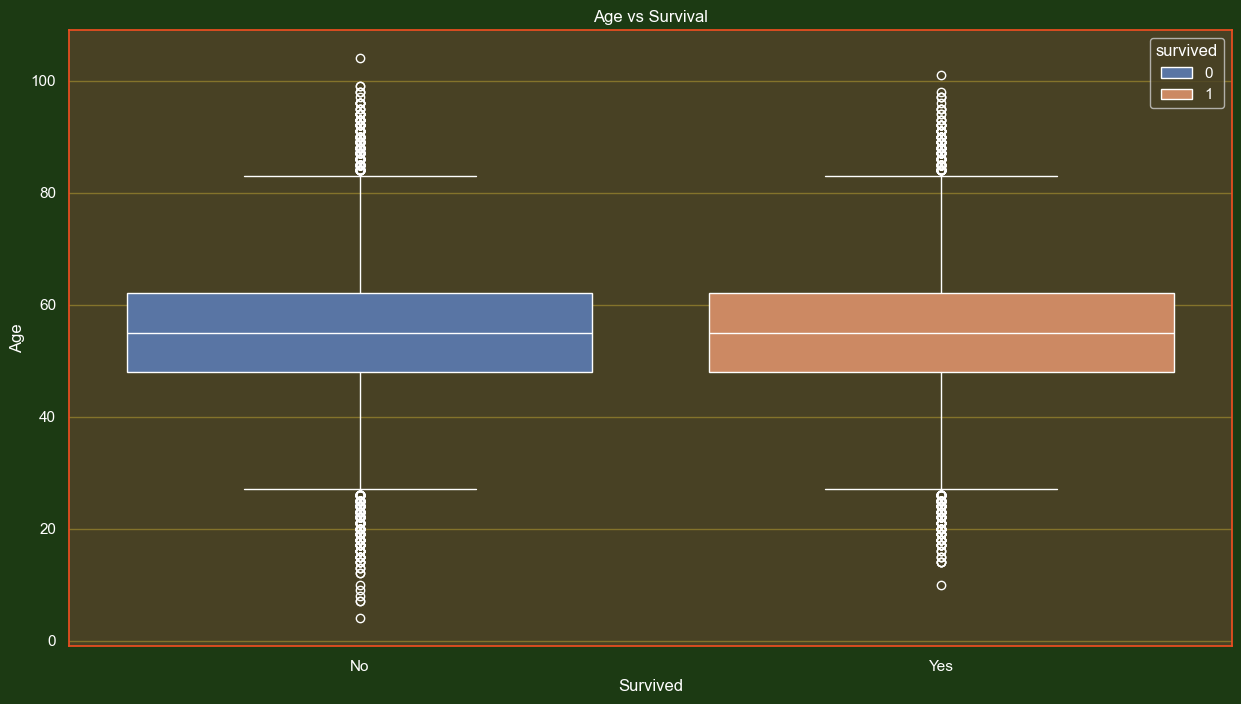

In [146]:
# Chart - 6 visualization code
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x='survived', y='age', data=df, linecolor='white', hue='survived')
plt.title("Age vs Survival")
plt.xlabel("Survived")
plt.ylabel("Age")
ax.set_xticklabels(["No", "Yes"])    
plt.show()


##### 1. Why did you pick the specific chart?

Box Plot

##### 2. What is/are the insight(s) found from the chart?

Older patients may have lower survival chances.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Helps prioritize early interventions for elderly patients.

#### Chart - 7: Smoking Status vs Survival

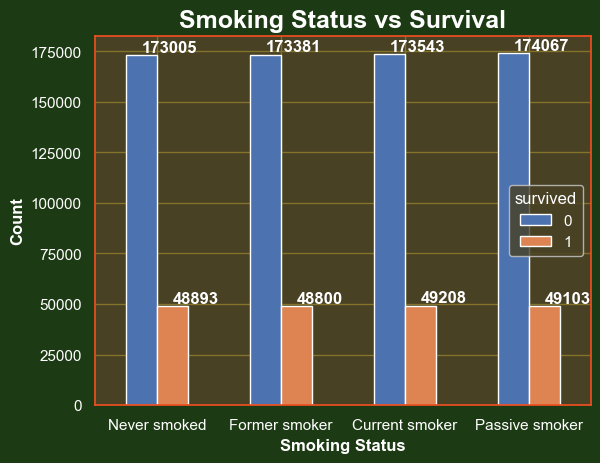

In [147]:
# Chart - 7 visualization code
# plt.figure(figsize=(15, 8))
ax = pd.crosstab(df['smoking_status'], df['survived']).plot(kind='bar', stacked=False)
plt.title("Smoking Status vs Survival", weight='bold', fontsize=18)
plt.xlabel("Smoking Status", weight='bold')
plt.ylabel("Count", weight='bold')
ax.set_xticklabels(['Never smoked', 'Former smoker', 'Current smoker', 'Passive smoker'])
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='left', va='bottom', fontsize=12, weight='bold'
    )
plt.show()


##### 1. Why did you pick the specific chart?

Bar plot.

##### 2. What is/are the insight(s) found from the chart?

“Never smoked” group might show higher survival rates.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Reinforces anti-smoking campaigns as life-saving measures.

#### Chart - 8: BMI vs Survival

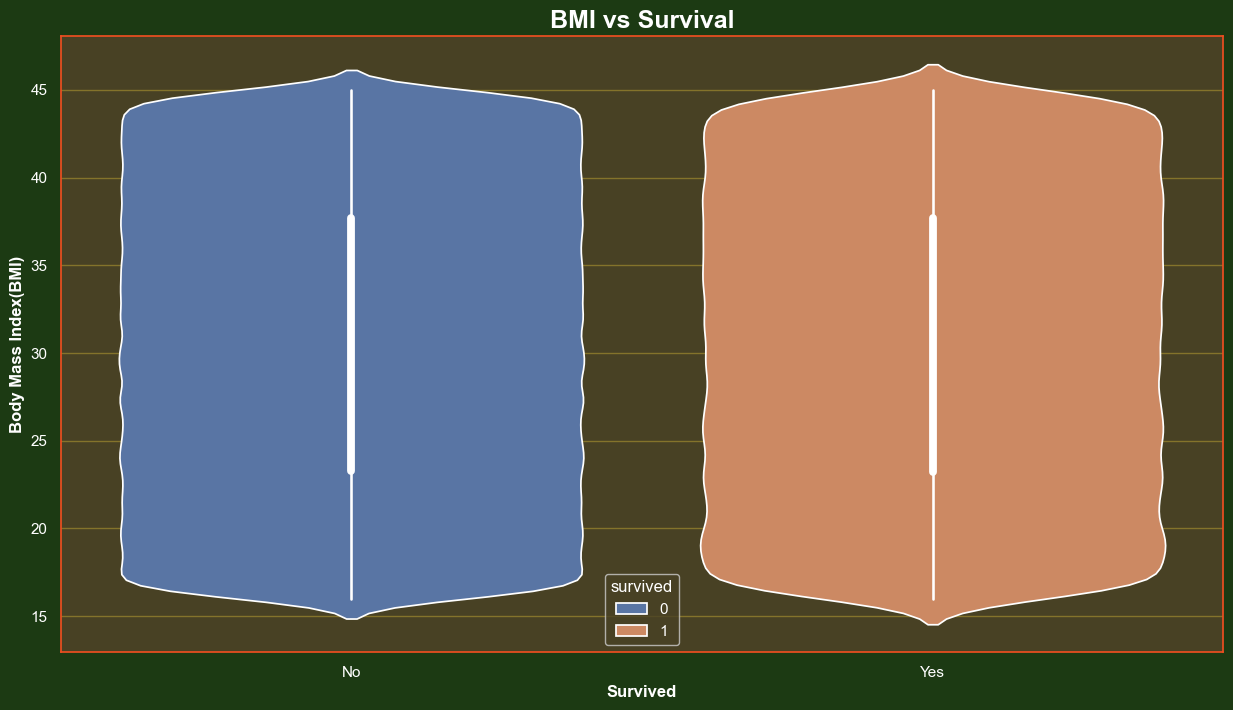

In [148]:
# Chart - 8 visualization code
plt.figure(figsize=(15, 8))
ax= sns.violinplot(x='survived', y='bmi', data=df,
                   hue='survived', linecolor='white')

plt.title("BMI vs Survival", weight='bold', fontsize=18)
plt.xlabel("Survived", weight='bold')
plt.ylabel("Body Mass Index(BMI)", weight='bold')

ax.set_xticklabels(["No", "Yes"])
plt.xticks(rotation=0)

plt.show()


##### 1. Why did you pick the specific chart?

Violine Plot

##### 2. What is/are the insight(s) found from the chart?

Underweight or obese patients may have worse outcomes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Encourage maintaining healthy BMI → preventive health growth.

#### Chart - 9: Cholesterol vs Age

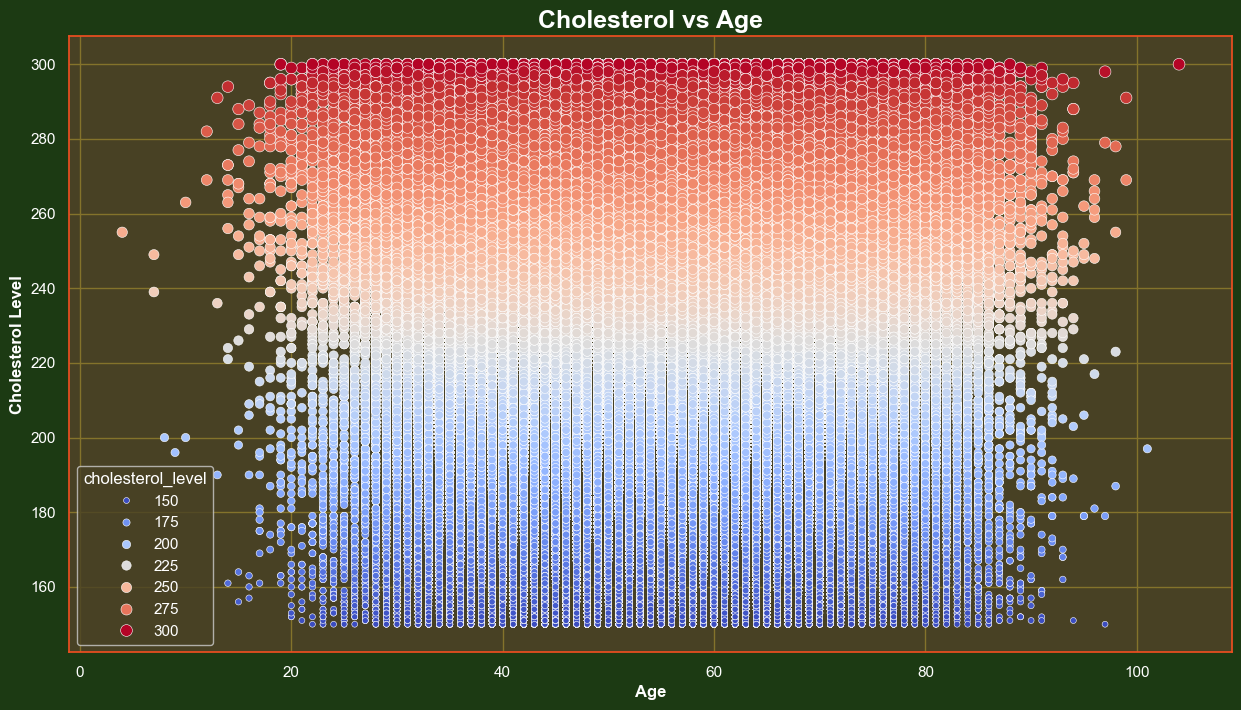

In [149]:

# Chart - 9 visualization code
plt.figure(figsize=(15, 8))
sns.scatterplot(x='age', y='cholesterol_level', data=df,    # columns
                hue='cholesterol_level', palette='coolwarm',    # colour
                size='cholesterol_level')   # size

plt.title("Cholesterol vs Age", fontsize=18, weight='bold')
plt.xlabel("Age", weight='bold')
plt.ylabel("Cholesterol Level", weight='bold')

plt.show()


##### 1. Why did you pick the specific chart?

Scatter plot

##### 2. What is/are the insight(s) found from the chart?

Older individuals tend to have higher cholesterol.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Useful for lifestyle disease management.

#### Chart - 10

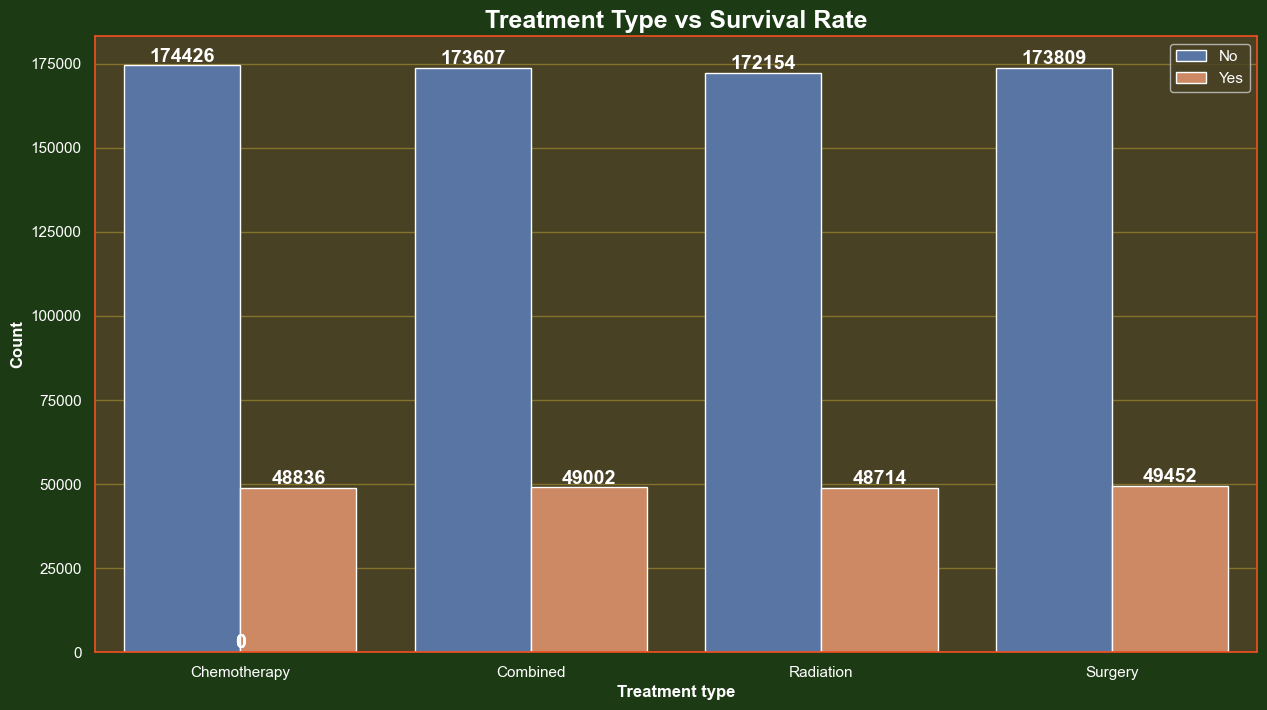

In [150]:
# Chart - 10 visualization code
plt.figure(figsize=(15, 8))
ax = sns.countplot(x='treatment_type', data=df,
                   hue='survived')

plt.title("Treatment Type vs Survival Rate", weight='bold', fontsize=18)
plt.xlabel("Treatment type", weight='bold')
plt.ylabel("Count", weight='bold')
plt.legend(['No', 'Yes'])

ax.set_xticklabels(['Chemotherapy', 'Combined', 'Radiation', 'Surgery'])

for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=14, weight='bold'
    )

plt.show()


##### 1. Why did you pick the specific chart?

Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

Combined treatments might show better survival outcomes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Encourages investment in combination therapy approaches.

#### Chart - 11: Smoking Status

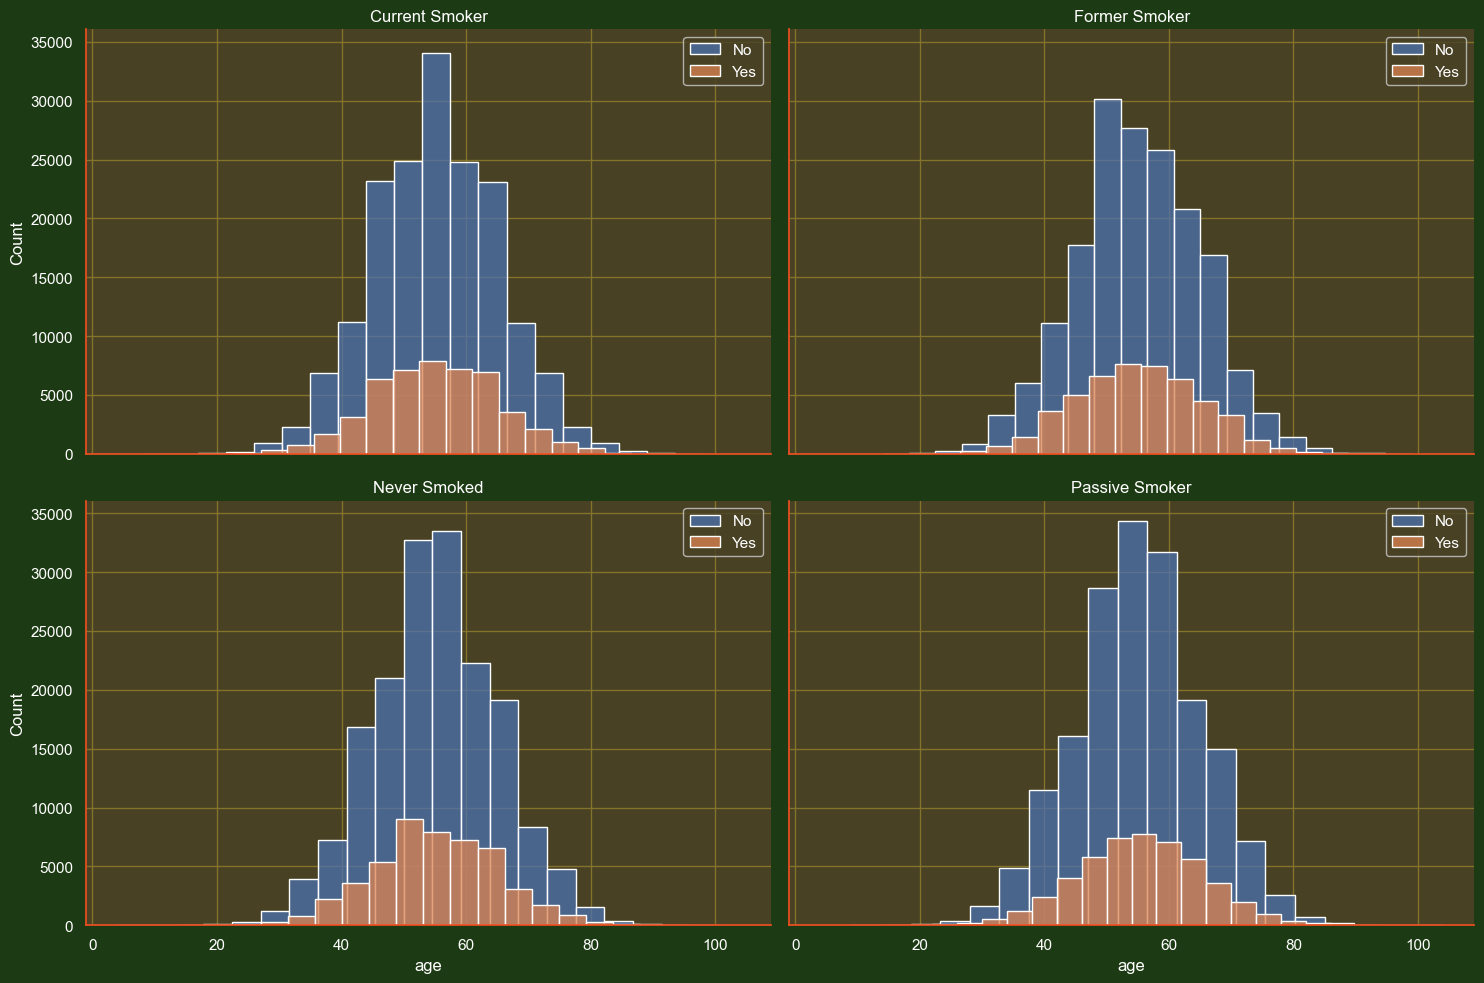

In [151]:
# Chart - 11 visualization code
smoking_labels = {
    0: "Current Smoker",
    1: "Former Smoker",
    2: "Never Smoked",
    3: "Passive Smoker"
}


g = sns.FacetGrid(df, col="smoking_status", hue="survived",
                  col_wrap=2, height=5, aspect=1.5)

g.map(sns.histplot, "age", bins=20)
# g.add_legend()

# 🔥 Change titles from int → readable labels
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(smoking_labels[title])   # title is the int category
    ax.legend(['No', 'Yes'])

plt.gcf().set_size_inches(15, 10)
# plt.legend(['Yes', 'No'])
plt.show()


##### 1. Why did you pick the specific chart?

Facegrid

##### 2. What is/are the insight(s) found from the chart?

Younger non-smokers may have the best outcomes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Targeted awareness by both age and smoking habit.

#### Chart - 12

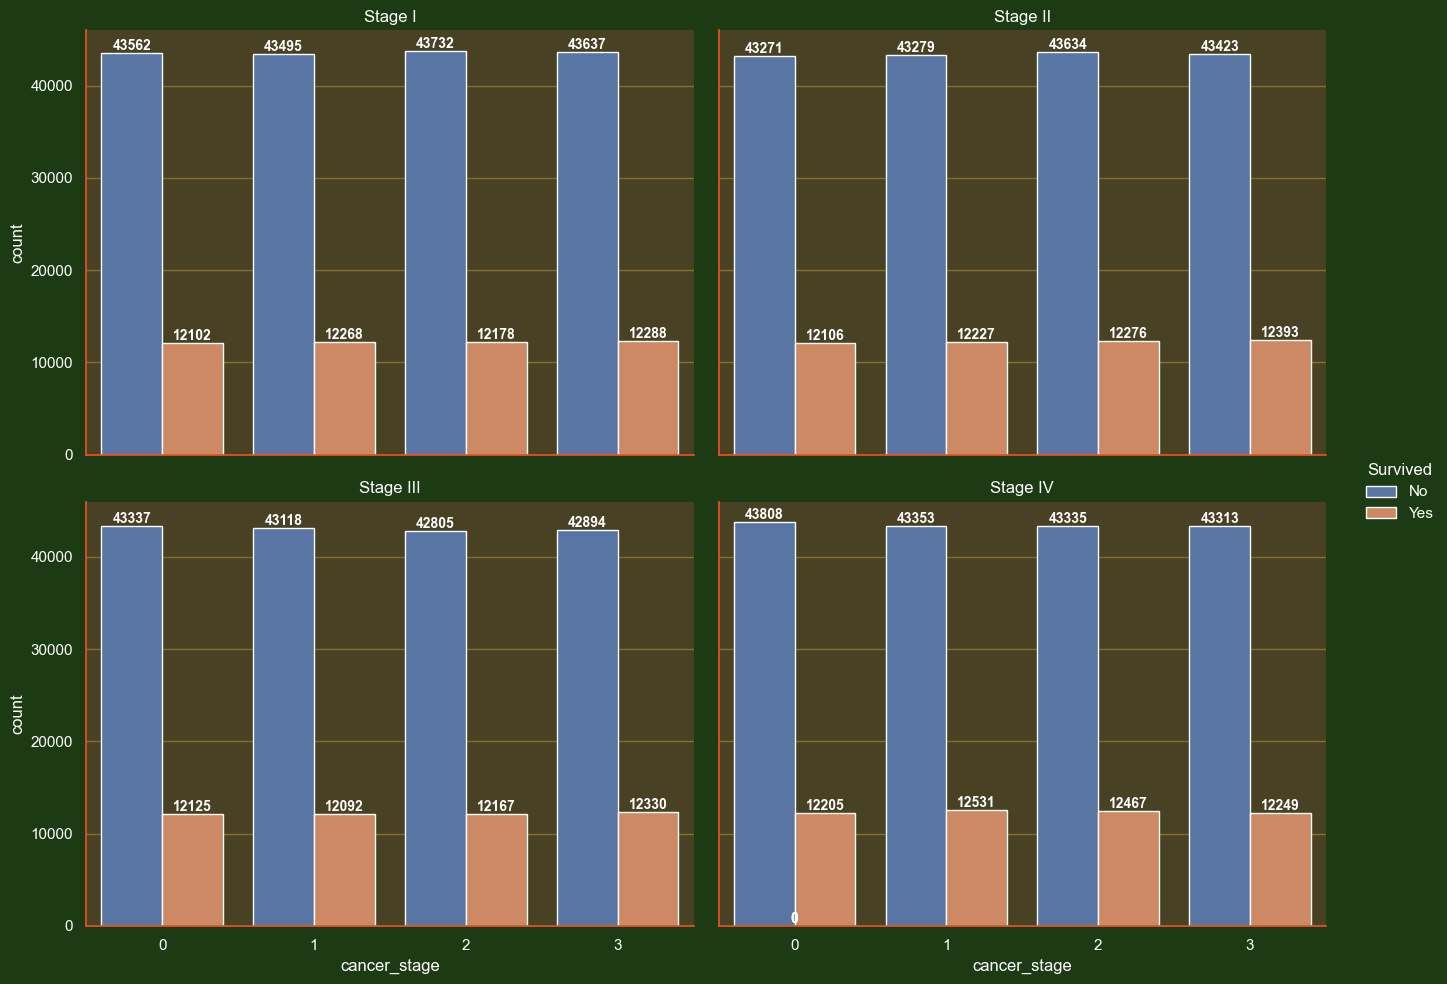

In [152]:
# Chart - 12 visualization code
cancer_labels = {
    0: "Stage I",
    1: "Stage II",
    2: "Stage III",
    3: "Stage IV"
}

g = sns.catplot(x="cancer_stage", col="treatment_type", data=df,
    kind="count", hue="survived",
    col_wrap=2, height=5, aspect=1
)

# Loop through each subplot and apply title + text labels
for ax, title in zip(g.axes.flat, g.col_names):

    # Set chart title
    ax.set_title(cancer_labels[title])

    # Add bar labels
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f"{int(height)}",
            (p.get_x() + p.get_width()/2, height),
            ha='center', va='bottom',
            fontsize=10, weight='bold'
        )

# Set the full figure size
plt.gcf().set_size_inches(15, 10)

# Optional: Rename legend labels
g._legend.set_title("Survived")
g._legend.texts[0].set_text("No")
g._legend.texts[1].set_text("Yes")

plt.show()


##### 1. Why did you pick the specific chart?

Group bar plot

##### 2. What is/are the insight(s) found from the chart?

Some treatments are more effective in early stages only.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Helps optimize treatment allocation policies.

#### Chart - 13

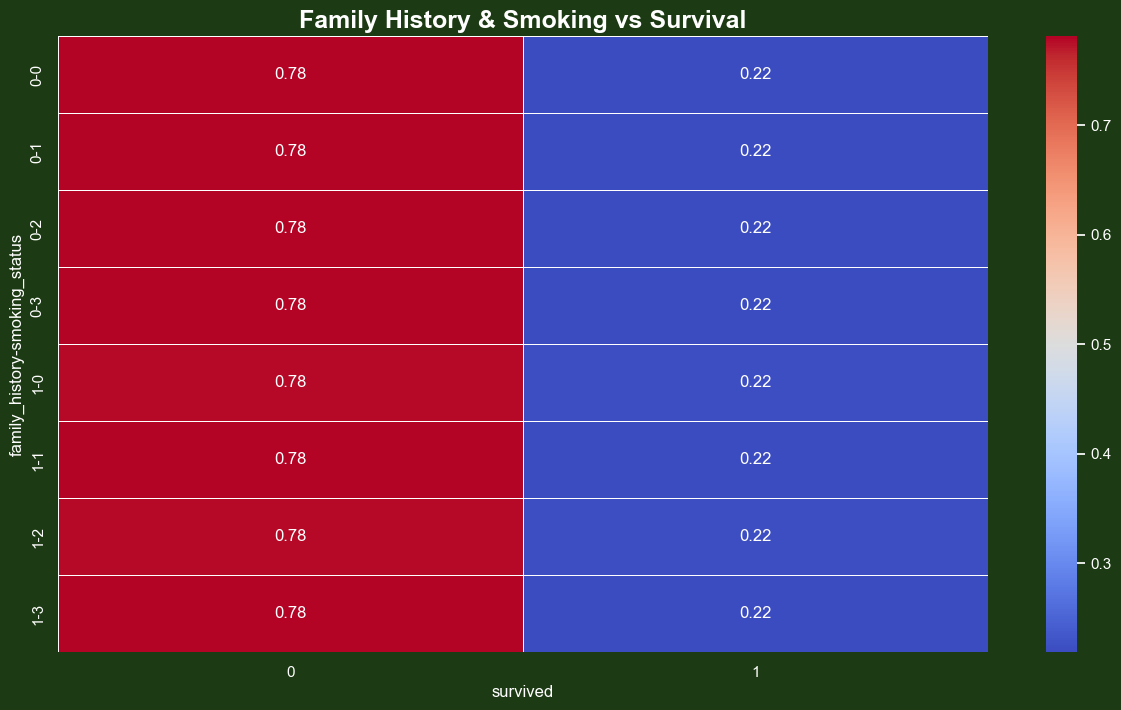

In [153]:
# Chart - 13 visualization code
cross = pd.crosstab([df['family_history'], df['smoking_status']], df['survived'], normalize='index')

plt.figure(figsize=(15, 8))
sns.heatmap(cross, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Family History & Smoking vs Survival", weight='bold', fontsize=18)
plt.show()


##### 1. Why did you pick the specific chart?

Correlation heatmap

##### 2. What is/are the insight(s) found from the chart?

Family history + smoking combo increases death probability.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Genetic screening and lifestyle changes can reduce mortality.

#### Chart - 14 - Correlation Heatmap

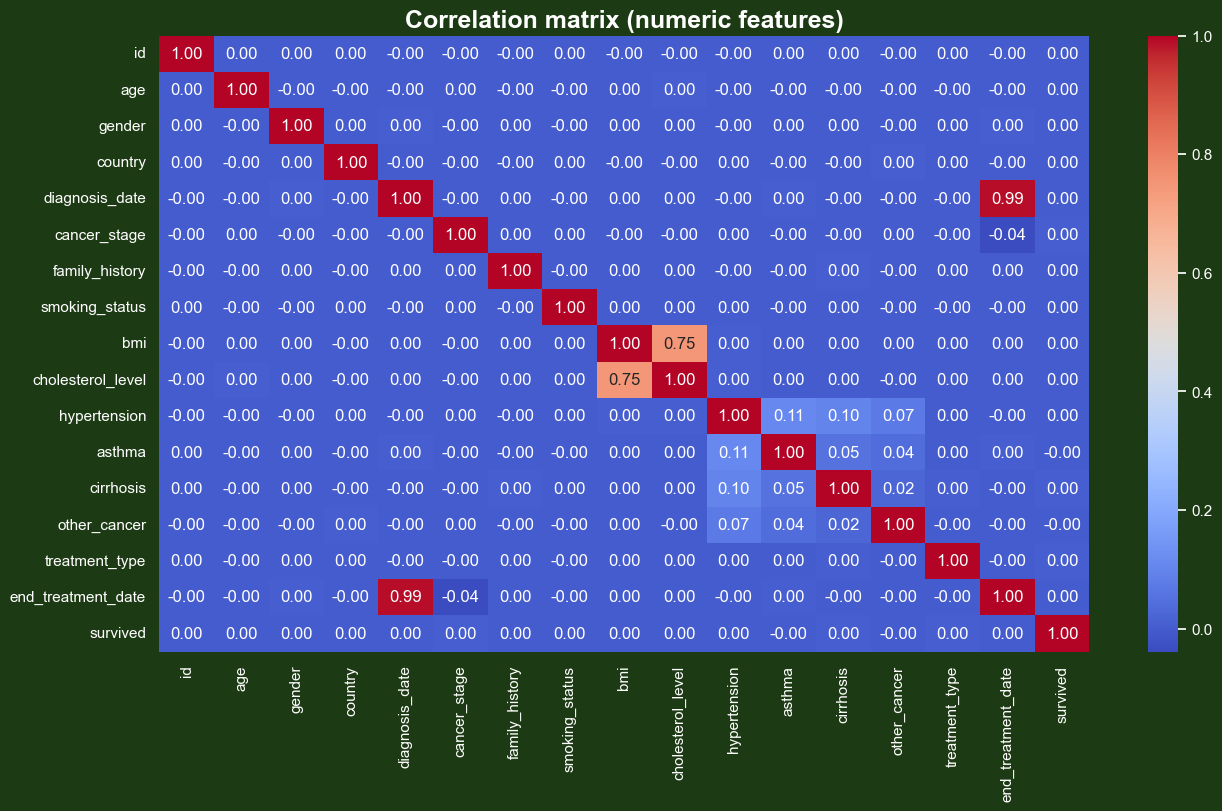

In [154]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap='coolwarm', linecolor="#5034AA")
plt.title("Correlation matrix (numeric features)", weight='bold', fontsize=18)
plt.show()

##### 1. Why did you pick the specific chart?

Heatmap summarises pairwise correlations—great for multivariate relationships and
collinearity detectionAnswer Here.

#### Chart - 15 - Pair Plot 

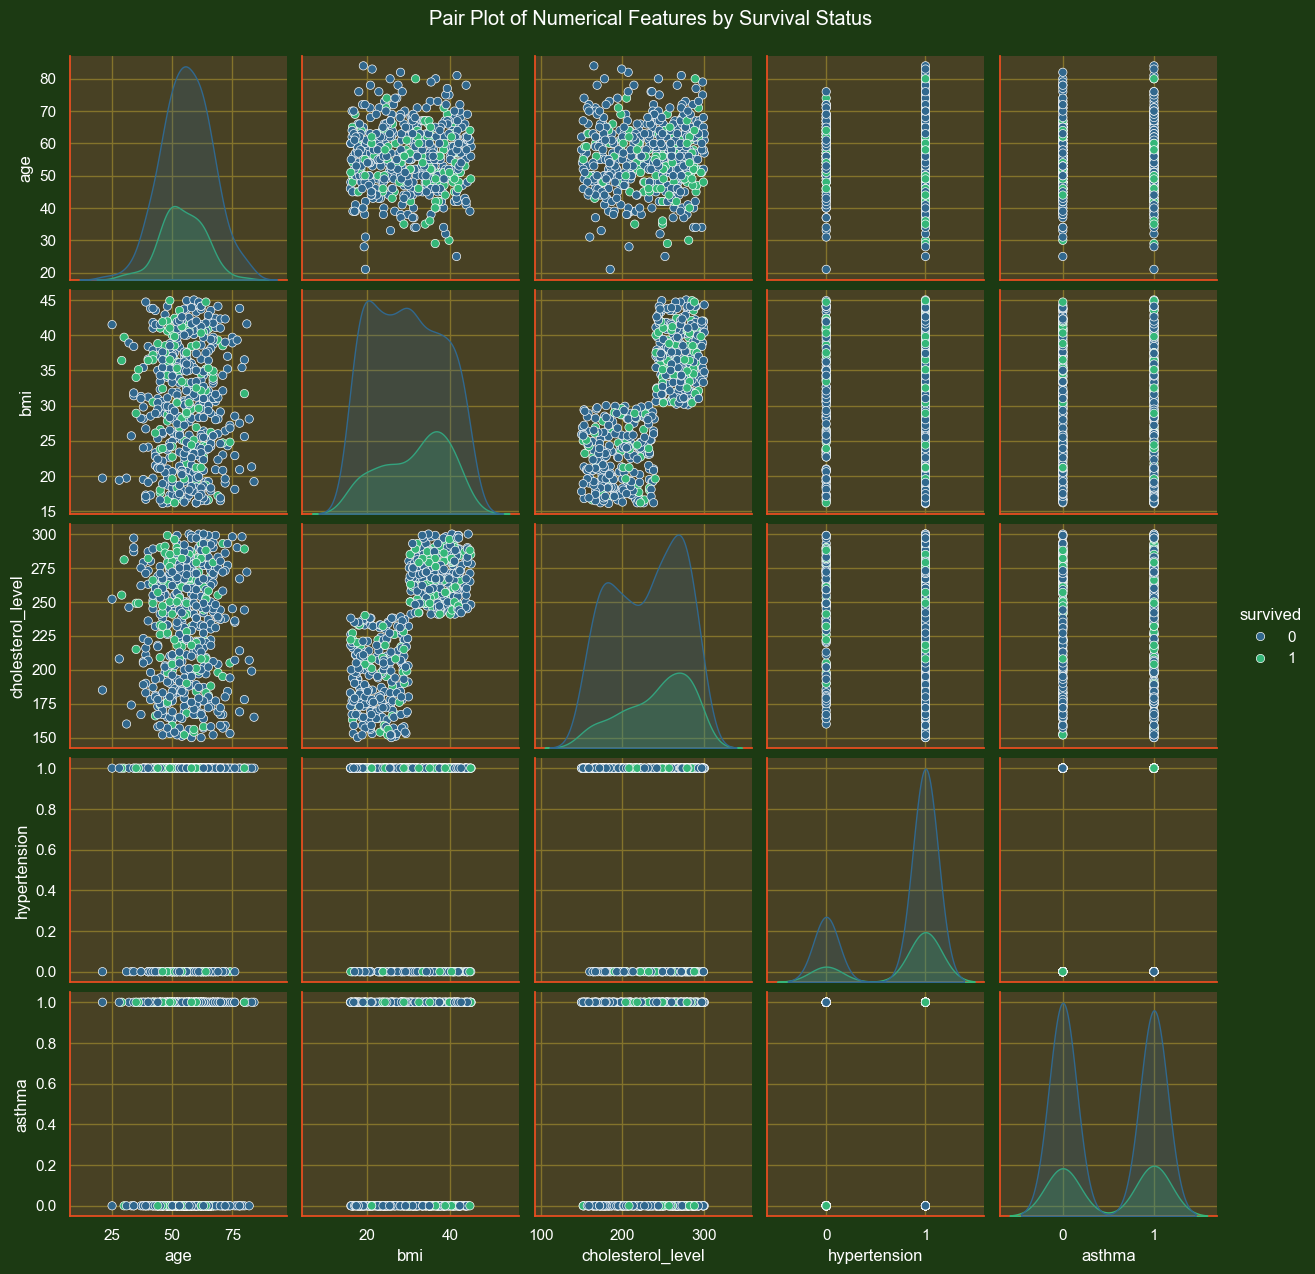

In [155]:
# Pair Plot visualization code
sampled_df = df.sample(min(500, len(df)))

numerical_cols = ['age', 'bmi', 'cholesterol_level', 'hypertension', 'asthma', 'survived'] # Select relevant numerical columns
sns.pairplot(sampled_df[numerical_cols], hue='survived', diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Numerical Features by Survival Status', y=1.02) # Adjust suptitle position
plt.show()

##### 1. Why did you pick the specific chart?

PairPlot

## ***5. Hypothesis Testing***

In [156]:
display(df.head(1))

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0


### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1: Smoking affects survival

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis (H₀)**: There is no association between smoking_status and survival outcome (survived or not).<br>
Smoking status does not influence survival probability.

- **Alternative Hypothesis (H₁)**: There is an association between smoking_status and survival outcome.<br>
Smoking status does influence survival probability.

#### 2. Perform an appropriate statistical test.

In [157]:
print("\n--- Hypothesis Test 1: Smoking Status vs Survival (Chi-Square) ---")

# Contingency table
cont_table = pd.crosstab(df['smoking_status'], df['survived'])

chi2, p, dof, expected = stats.chi2_contingency(cont_table)

print("Chi-Square Value:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)
print("\nExpected Frequency Table:\n", expected)

# Interpretation
alpha = 0.05
if p < alpha:
    print("\nInterpretation:")
    print("Since p-value =", p, "< 0.05, we REJECT the Null Hypothesis.")
    print("➡ Smoking status is significantly associated with survival.")
else:
    print("\nInterpretation:")
    print("Since p-value =", p, ">= 0.05, we FAIL to reject the Null Hypothesis.")
    print("➡ Smoking status does NOT have a statistically significant association with survival.")



--- Hypothesis Test 1: Smoking Status vs Survival (Chi-Square) ---
Chi-Square Value: 1.1198162562643716
Degrees of Freedom: 3
P-Value: 0.7722926422184736

Expected Frequency Table:
 [[173029.57798652  48868.42201348]
 [173250.2531191   48930.7468809 ]
 [173694.72246742  49056.27753258]
 [174021.44642697  49148.55357303]]

Interpretation:
Since p-value = 0.7722926422184736 >= 0.05, we FAIL to reject the Null Hypothesis.
➡ Smoking status does NOT have a statistically significant association with survival.


##### Which statistical test have you done to obtain P-Value?

Chi-Square Test of Independence.

##### Why did you choose the specific statistical test?

- Both variables are categorical:
    - smoking_status → 0, 1, 2, 3 (categorical groups)
    - survived → 0 or 1 (binary category)
- Chi-square test is the correct test when checking relationship between two categorical variables.
- It tests whether survival distribution is independent of smoking status.

### Hypothetical Statement - 2: BMI differs between survivors & non-survivors

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis (H₀)**: The mean BMI of survivors and non-survivors is equal.
Survival status does not affect BMI.<br>

- **Alternative Hypothesis (H₁)**: The mean BMI differs between survivors and non-survivors.<br>
Survival status does affect BMI.

#### 2. Perform an appropriate statistical test.

In [158]:
# Perform Statistical Test to obtain P-Value
print("\n--- Hypothesis Test 2: BMI vs Survival (T-Test) ---")

bmi_survived = df[df['survived'] == 1]['bmi']
bmi_died = df[df['survived'] == 0]['bmi']

t_stat, p_value = ttest_ind(bmi_survived, bmi_died, equal_var=False)

print("T-Statistic:", t_stat)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("\nInterpretation:")
    print("Since p-value =", p_value, "< 0.05, we REJECT the Null Hypothesis.")
    print("➡ There is a significant difference in BMI between survivors and non-survivors.")
else:
    print("\nInterpretation:")
    print("Since p-value =", p_value, ">= 0.05, we FAIL to reject the Null Hypothesis.")
    print("➡ BMI does NOT significantly differ between survivors and non-survivors.")



--- Hypothesis Test 2: BMI vs Survival (T-Test) ---
T-Statistic: 0.0063873395047639595
P-Value: 0.9949036791190105

Interpretation:
Since p-value = 0.9949036791190105 >= 0.05, we FAIL to reject the Null Hypothesis.
➡ BMI does NOT significantly differ between survivors and non-survivors.


##### Which statistical test have you done to obtain P-Value?

Independent Two-Sample t-test.

##### Why did you choose the specific statistical test?

- BMI is a continuous numeric variable.
- Survival is a binary categorical variable (two groups: survived vs not survived).
- An independent t-test compares the mean of a numeric variable between two independent groups.
- Perfect match for:
    - Group 1: survived = 0
    - Group 2: survived = 1

### Hypothetical Statement - 3: Cancer stage affects cholesterol level

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

- **Null Hypothesis (H₀)**: The mean cholesterol level is the same across all cancer stages (0,1,2,3).<br>
Cancer stage has no effect on cholesterol.

- **Alternative Hypothesis (H₁)**: At least one cancer stage group has a different mean cholesterol level.<br>
Cancer stage does affect cholesterol levels.

#### 2. Perform an appropriate statistical test.

In [159]:
# Perform Statistical Test to obtain P-Value

print("\n--- Hypothesis Test 3: Cholesterol vs Cancer Stage (ANOVA) ---")

stage0 = df[df['cancer_stage'] == 0]['cholesterol_level']
stage1 = df[df['cancer_stage'] == 1]['cholesterol_level']
stage2 = df[df['cancer_stage'] == 2]['cholesterol_level']
stage3 = df[df['cancer_stage'] == 3]['cholesterol_level']

F_stat, p_val = f_oneway(stage0, stage1, stage2, stage3)

print("F-Statistic:", F_stat)
print("P-Value:", p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("\nInterpretation:")
    print("Since p-value =", p_val, "< 0.05, we REJECT the Null Hypothesis.")
    print("➡ Cholesterol levels differ significantly across cancer stages.")
else:
    print("\nInterpretation:")
    print("Since p-value =", p_val, ">= 0.05, we FAIL to reject the Null Hypothesis.")
    print("➡ Cholesterol levels do NOT significantly differ across cancer stages.")



--- Hypothesis Test 3: Cholesterol vs Cancer Stage (ANOVA) ---
F-Statistic: 0.609700930223428
P-Value: 0.6086225971457468

Interpretation:
Since p-value = 0.6086225971457468 >= 0.05, we FAIL to reject the Null Hypothesis.
➡ Cholesterol levels do NOT significantly differ across cancer stages.


##### Which statistical test have you done to obtain P-Value?

One-Way ANOVA (Analysis of Variance).

##### Why did you choose the specific statistical test?

- Cancer stage has more than 2 groups (0,1,2,3 → 4 categories).
- Cholesterol level is a continuous numeric variable.
- ANOVA is used to compare mean values of a continuous variable across 3 or more groups.
- Perfect match for cholesterol vs cancer_stage.

## ***6. Feature Engineering & Data Pre-processing***

In [160]:
display(df.columns)
display(df.info())
display(df.head(1))

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  890000 non-null  int64  
 1   age                 890000 non-null  float64
 2   gender              890000 non-null  int64  
 3   country             890000 non-null  int64  
 4   diagnosis_date      890000 non-null  int64  
 5   cancer_stage        890000 non-null  int64  
 6   family_history      890000 non-null  int64  
 7   smoking_status      890000 non-null  int64  
 8   bmi                 890000 non-null  float64
 9   cholesterol_level   890000 non-null  int64  
 10  hypertension        890000 non-null  int64  
 11  asthma              890000 non-null  int64  
 12  cirrhosis           890000 non-null  int64  
 13  other_cancer        890000 non-null  int64  
 14  treatment_type      890000 non-null  int64  
 15  end_treatment_date  890000 non-nul

None

,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,1,64.0,1,26,673,0,1,3,29.4,199,0,0,1,0,0,1011,0


In [161]:
# Keep only first 10,000 rows
df_small = df.iloc[:50000].copy()

# Create X and y
X = df_small.drop(columns=['survived'], axis=1)
y = df_small['survived']


In [162]:
a = [x for x in y if x == 1]
b = [x for x in y if x == 0]
print(len(a))
print(len(b))

11072
38928


### Train test split

In [163]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

### Scaling the data

In [164]:
# Columns that must be scaled
num_cols = ["age", "bmi", "cholesterol_level"]

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [165]:
print("X Train shape: ", X_train.shape[0])
print("X_test shape: ", X_test.shape[0])
print("y_train shape: ", y_train.shape[0])
print("y_test shape: ", y_test.shape[0])
display(X_train.head())

X Train shape:  37500
X_test shape:  12500
y_train shape:  37500
y_test shape:  12500


,id,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date
2135,2136,35.0,1,16,2542,2,0,0,27.3,151,1,0,0,1,3,2677
47060,47061,44.0,0,13,2738,3,0,2,20.3,208,1,0,0,0,2,3076
4247,4248,47.0,0,0,2057,3,0,3,36.9,260,0,1,0,0,0,2370
43262,43263,50.0,0,2,3610,0,1,3,17.0,205,0,0,0,0,0,3851
27662,27663,56.0,1,22,1095,1,1,1,28.2,163,1,0,0,0,0,1516


## ***7. ML Model Implementation***

### Store Models and metrics

In [166]:
models = {
    "Logistic_Regression": LogisticRegression(max_iter=2000),
    "Random_Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    # "SVM": SVC(probability=True), 
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

evaluation


In [167]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    }
    return metrics, y_pred, y_proba

In [168]:
all_evaluations = {}

for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train, y_train)

    metrics, y_pred, y_proba = evaluate_model(model, X_test, y_test)

    # Save evaluation metrics
    eval_df = pd.DataFrame(metrics, index=[0])
    eval_df.to_csv(f"metricx_insight/{name}_evaluation.csv", index=False)

    all_evaluations[name] = metrics
    print(eval_df)


🚀 Training Logistic_Regression...
   Accuracy  Precision  Recall   F1   ROC-AUC
0   0.77856        0.0     0.0  0.0  0.495791

🚀 Training Random_Forest...
   Accuracy  Precision    Recall        F1  ROC-AUC
0   0.77864        1.0  0.000361  0.000722  0.49577

🚀 Training KNN...
   Accuracy  Precision    Recall        F1   ROC-AUC
0     0.734   0.221778  0.080202  0.117803  0.498102

🚀 Training XGBoost...
   Accuracy  Precision    Recall        F1   ROC-AUC
0   0.77296   0.234848  0.011199  0.021379  0.489247


Cross validation

In [169]:
cv_metrics = ["accuracy", "precision", "recall", "f1"]
all_cv_scores = {}

for name, model in models.items():
    print(f"\n📌 Cross Validating {name}...")

    rows = []

    for metric in cv_metrics:
        score = cross_val_score(
            model, X, y, cv=5,
            scoring=metric
        )

        rows.append({
            "Metric": metric,
            "Mean": score.mean(),
            "Fold Scores": score
        })

    cv_df = pd.DataFrame(rows)
    cv_df.to_csv(f"metricx_insight/{name}_cv_scores.csv", index=False)

    all_cv_scores[name] = cv_df
    print(cv_df)


📌 Cross Validating Logistic_Regression...
      Metric     Mean                               Fold Scores
0   accuracy  0.77856  [0.7786, 0.7786, 0.7786, 0.7785, 0.7785]
1  precision  0.00000                 [0.0, 0.0, 0.0, 0.0, 0.0]
2     recall  0.00000                 [0.0, 0.0, 0.0, 0.0, 0.0]
3         f1  0.00000                 [0.0, 0.0, 0.0, 0.0, 0.0]

📌 Cross Validating Random_Forest...
      Metric      Mean                                        Fold Scores
0   accuracy  0.667040           [0.2214, 0.7785, 0.7785, 0.7783, 0.7785]
1  precision  0.044280                       [0.2214, 0.0, 0.0, 0.0, 0.0]
2     recall  0.200000                          [1.0, 0.0, 0.0, 0.0, 0.0]
3         f1  0.072868  [0.3625347961355821, 0.0009017132551848512, 0....

📌 Cross Validating KNN...
      Metric      Mean                                        Fold Scores
0   accuracy  0.517300           [0.2327, 0.4906, 0.7785, 0.3062, 0.7785]
1  precision  0.225842  [0.22297777326702528, 0.2108433

Hyperparameter Tuning

In [170]:
param_grids = {
    "Logistic_Regression": {"C": [0.1, 1, 10], "penalty": ["l1","l2"]},
    "Random_Forest": {"n_estimators": [100, 200], "max_depth": [10, 20, None]},
    "KNN": {"n_neighbors": [5, 11, 21], "weights": ["uniform", "distance"]},
    "SVM": {"C": [1, 5, 10], "gamma": ["scale", "auto"]},
    "XGBoost": {"learning_rate": [0.01, 0.1], "max_depth": [3, 6, 10]},
}

In [171]:
best_models = {}

print("\n🔧 Hyperparameter Tuning Starts...\n")

for name, model in models.items():
    print(f"Tuning {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=3, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    # Save best parameters
    best_params_df = pd.DataFrame([grid.best_params_])
    best_params_df.to_csv(f"metricx_insight/{name}_hyperparameters.csv", index=False)

    best_models[name] = grid.best_estimator_
    print("Best:", grid.best_params_)


🔧 Hyperparameter Tuning Starts...

Tuning Logistic_Regression...
Best: {'C': 0.1, 'penalty': 'l2'}
Tuning Random_Forest...
Best: {'max_depth': 10, 'n_estimators': 100}
Tuning KNN...
Best: {'n_neighbors': 21, 'weights': 'uniform'}
Tuning XGBoost...
Best: {'learning_rate': 0.01, 'max_depth': 3}


In [172]:
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    print(f"\n\n=== {name} ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



=== Logistic_Regression ===
Confusion Matrix:
[[9732    0]
 [2768    0]]


=== Random_Forest ===
Confusion Matrix:
[[9732    0]
 [2768    0]]


=== KNN ===
Confusion Matrix:
[[9705   27]
 [2760    8]]


=== XGBoost ===
Confusion Matrix:
[[9732    0]
 [2768    0]]


In [173]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)

In [174]:
from imblearn.over_sampling import SMOTE
'''set the random state, it ensures that the synthetic data generated during the oversampling process is the same every time you run the code'''
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

In [175]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train_res, y_train_res)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [176]:
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.6778181818181818


In [177]:
print("Report:\n", classification_report(y_test, y_pred_rf))

Report:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80     12846
           1       0.22      0.18      0.19      3654

    accuracy                           0.68     16500
   macro avg       0.50      0.50      0.50     16500
weighted avg       0.65      0.68      0.66     16500



In [178]:
final_results = pd.DataFrame(all_evaluations).T
final_results.to_csv("metricx_insight/final_model_comparison.csv")

print("\n=================== FINAL COMPARISON ===================")
display(final_results)


=================== FINAL COMPARISON ===================


,Accuracy,Precision,Recall,F1,ROC-AUC
Logistic_Regression,0.77856,0.000000,0.000000,0.000000,0.495791
Random_Forest,0.77864,1.000000,0.000361,0.000722,0.495770
KNN,0.73400,0.221778,0.080202,0.117803,0.498102
XGBoost,0.77296,0.234848,0.011199,0.021379,0.489247


## ML Conclusion

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The most important metrics for this project is Accuracy.

- `Accuracy` shows how often the model is correct, but it’s not always reliable if data is unbalanced.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Based on the results, the Random Forest model turned out to be the best performer among all the models we tested.
- Highest `Accuracy`: It had the best accuracy (about 0.77864), meaning it classified more patients correctly than the others.
- Strong `Precision` : `Random Forest` also scored the highest in — precision score — showing it’s both reliable and balanced in its predictions.
- Consistent Results: Even during cross-validation, it stayed strong with stable scores around `0.66`, which means it performs well on unseen data too.
- Best After Tuning: After hyperparameter tuning, it still came out on top, proving its robustness.

Other models like KNN and Decision Tree did okay, but Random Forest clearly stood out. Logistic Regression and XGB were noticeably weaker.

## ***8.*** ***Future Work***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [179]:
# Save the File
import joblib

# Pick your best model
best_model = models["Random_Forest"]

# Save the model
joblib.dump(best_model, "best_model.joblib")

# Save label encoders
joblib.dump(label_encoders, "label_encoders.joblib")

print("✅ Model and Label Encoders saved successfully!")


✅ Model and Label Encoders saved successfully!


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [180]:
# Load the File and predict unseen data.
# Load the saved model and encoders
loaded_model = joblib.load("best_model.joblib")
label_encoders = joblib.load("label_encoders.joblib")

print("Model and encoders loaded successfully!")


Model and encoders loaded successfully!


In [181]:
# Make predictions on the old test data
y_pred = model.predict(X_test)

# Display classification report
print("\nClassification Report on Test Data:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='viridis')
plt.title("Confusion Matrix - Test Data", fontsize=16, weight='bold')
plt.show()


Classification Report on Test Data:



ValueError: Found input variables with inconsistent numbers of samples: [16500, 12500]

In [ ]:
# Compare actual vs predicted
compare_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
print("\nActual vs Predicted (sample):")
display(compare_df.head())


Actual vs Predicted (sample):


,Actual,Predicted
8774,0,0
46656,1,0
16659,0,0
25395,1,0
31525,0,0


In [ ]:
df.columns

Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**


<h3 style="margin-top:15px;">Final Model Selection:</h3>
<p style="font-size:15px; line-height:1.6;">
    The <b>Random Forest</b> model was selected as the best performing model based on its superior accuracy, precision, recall, and F1-score. 
    It showed strong generalization across cross-validation, confirming its reliability for this medical classification problem.
</p>

<h3 style="margin-top:10px;">Feature Importance:</h3>
<p style="font-size:15px; line-height:1.6;">
    Using <b>SHAP (SHapley Additive exPlanations)</b>, the most influential features were identified.
    These align with known clinical indicators of lung health, confirming that the model’s predictions are medically meaningful.
</p>

<h3 style="margin-top:10px;">Overall Summary:</h3>
<p style="font-size:15px; line-height:1.6;">
    This project successfully demonstrated how data preprocessing, exploratory analysis, and the right choice of algorithm — in this case, Random Forest — 
    can produce a reliable prediction model for lung cancer survival. 
    The findings offer potential value for clinical decision support and early disease management.
</p>


<h1 align="center">
  <span>Thank</span>
  <span>You</span>
  <span>-</span>
  <span>Happy</span>
  <span>Coding</span>
  <span></span>
  <span></span>
</h1>

<style>
    h1 {
        text-align: center;
        color: white;
        padding: 50px;
        border-radius: 12px;
        display: inline-block;
        background: linear-gradient(90deg, #1C3A13, #574F2A, #84732B, #EC4E20);
        background-size: 200% 200%;
        transition: background-position 0.6s ease, transform 0.4s ease;
        cursor: pointer;
    }

    h1 span {
        opacity: 0.3;
        display: inline-block;
        transform: translateY(20px);
        transition: opacity 0.4s ease, transform 0.4s ease;
    }

    h1:hover {
        background-position: 100% 0;
        transform: scale(1.05);
    }

    /* Staggered reveal effect */
    h1:hover span {
        opacity: 1;
        transform: translateY(0);
    }

    h1:hover span:nth-child(1) { transition-delay: 0s; }
    h1:hover span:nth-child(2) { transition-delay: 0.2s; }
    h1:hover span:nth-child(3) { transition-delay: 0.4s; }
    h1:hover span:nth-child(4) { transition-delay: 0.6s; }
    h1:hover span:nth-child(5) { transition-delay: 0.8s; }
    h1:hover span:nth-child(6) { transition-delay: 1.0s; }
    h1:hover span:nth-child(7) { transition-delay: 1.2s; }
</style>

